In [ ]:
!pip install -q -U transformers
!pip install -q bitsandbytes accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.7 MB/s eta 0:00:00


In [ ]:
import torch
import requests
import accelerate
from PIL import Image
import bitsandbytes as bnb
from transformers import pipeline
from transformers import BitsAndBytesConfig

In [ ]:
image_url = "https://m.media-amazon.com/images/I/318qeLWHofS.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

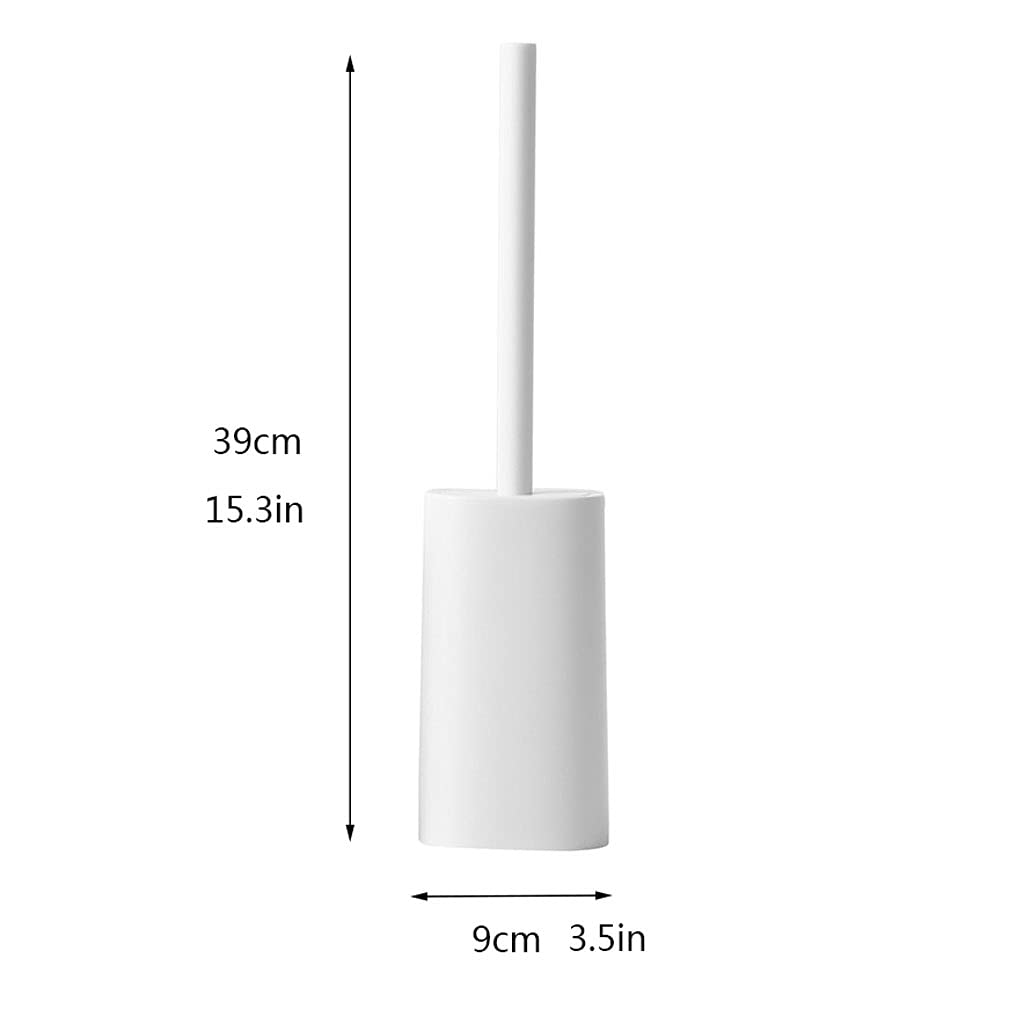

In [ ]:
max_new_tokens = 200
model_id = "llava-hf/llava-1.5-7b-hf"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

In [15]:
string = input("Enter a query: ")
prompt = f'USER: <image>\n{string}\nASSISTANT:'
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

Enter a query: what is the size of the smallest dimension of the object


In [16]:
print(outputs[0]["generated_text"])

USER:  
what is the size of the smallest dimension of the object
ASSISTANT: The smallest dimension of the object is 9.3 cm.
